## Importing the basic libraries

In [11]:
import numpy as np
import pandas as pd

## Importing the data set

In [12]:
df = pd.read_csv('Restaurant_Reviews.tsv', delimiter='\t', quoting=3)
print(df)

                                                Review  Liked
0                             Wow... Loved this place.      1
1                                   Crust is not good.      0
2            Not tasty and the texture was just nasty.      0
3    Stopped by during the late May bank holiday of...      1
4    The selection on the menu was great and so wer...      1
..                                                 ...    ...
995  I think food should have flavor and texture an...      0
996                           Appetite instantly gone.      0
997  Overall I was not impressed and would not go b...      0
998  The whole experience was underwhelming, and I ...      0
999  Then, as if I hadn't wasted enough of my life ...      0

[1000 rows x 2 columns]


## Refining the data

In [13]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
corpus = [] # list will contain all the refined reviews

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\V.SAIPRIYA\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [14]:
for i in range(0,1000):
    review = df['Review'][i] # Collecting the reviews one by one
    review = re.sub('[^a-zA-z]', ' ', review) # replacing the punctuations with space
    review = review.lower() # converting all the characters into lower case
    review = review.split() # splitting word of the statement i.e converting a statement into list of words
    ps = PorterStemmer() # creating the object of the porter stemmer class
    all_stopwords = stopwords.words('english') # collecting the english language stop words
    arr=['not','no','didn',"shouldn't",'wasn','weren','won',]
    for i in arr:
        all_stopwords.remove(i)
    all_stopwords.append('order')
    all_stopwords.append('waited')
    all_stopwords.append("bland")
    all_stopwords.append('still')
    all_stopwords.append('place')
    all_stopwords.append('feel')
    all_stopwords.append('buffet')
    
    review =[ps.stem(word) for word in review if not word in set(all_stopwords)]
    # coverting the list of words back to statement
    # for this we will use the join function
    review = ' '.join(review)
    corpus.append(review) # collecting the refined reviews

In [15]:
print(corpus)

['wow love', 'crust not good', 'not tasti textur nasti', 'stop late may bank holiday rick steve recommend love', 'select menu great price', 'get angri want damn pho', 'honeslti didn tast fresh', 'potato like rubber could tell made ahead time kept warmer', 'fri great', 'great touch', 'servic prompt', 'would not go back', 'cashier no care ever say end wayyy overpr', 'tri cape cod ravoli chicken cranberri mmmm', 'disgust pretti sure human hair', 'shock no sign indic cash', 'highli recommend', 'waitress littl slow servic', 'not worth time let alon vega', 'not like', 'burritto blah', 'food amaz', 'servic also cute', 'could care less interior beauti', 'perform', 'right red velvet cake ohhh stuff good', 'never brought salad ask', 'hole wall great mexican street taco friendli staff', 'took hour get food tabl restaur food luke warm sever run around like total overwhelm', 'worst salmon sashimi', 'also combo like burger fri beer decent deal', 'like final blow', 'found accid could not happier', 's

## creating bag of words

In [16]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=1600)
# using the max_feature parameter of countVectorizer to limit the number of columns in x
x = cv.fit_transform(corpus).toarray()
y = df.iloc[:,-1].values
len(x[0])

1569

## splitting x and y into training and test set

In [17]:
from sklearn.model_selection import train_test_split
x_tr,x_te,y_tr,y_te = train_test_split(x,y,test_size = 0.2, random_state = 0)

## creating and training the svm model

In [18]:
from sklearn.svm import SVC
classifier = SVC(kernel='linear', random_state=0)
classifier.fit(x_tr,y_tr)

SVC(kernel='linear', random_state=0)

In [19]:
# predicting the output
y_pr = classifier.predict(x_te)

0.875


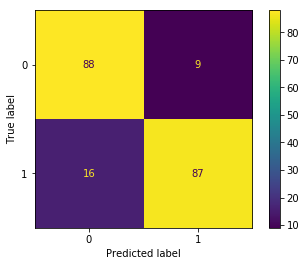

In [20]:
# plotting the confusion matrix and accuracy score
from sklearn.metrics import plot_confusion_matrix, accuracy_score
plot_confusion_matrix(estimator=classifier,X=x_te, y_true=y_te)
acc = accuracy_score(y_te,y_pr)
print(acc)